In [328]:
from sympy import  *
import matplotlib.pyplot as plt
from sympy.abc import t # x is the independent variable
from PIL import Image
import numpy as np
init_printing()
%matplotlib inline

<h1 style="text-align:center"> Sistemas de primeira ordem</h1>

<ul>
    
<li><p>A partir do momento que foi modelada a função de transferência, podemos então analisar o desempenho do sistema a partir de suas resposta.</p></li>
<li><p>Sinais de entradas tipicos para se analisar as respostas das funções de transferência são degrau, rampa, senoide</p></li>
<li><p>A resposta de um sistema de controle é constituida por duas partes, a parte transitória e a resposta estacionária</p></li>
</ul>

In [329]:
#Definindo funções para nosso estudo
t, s,x= symbols("t s x")
T = symbols("T", integer=True, positive=True)
C = Function("c_total")(t)
C_transitoria  = Function("c_transitoria")(t)
C_estacionária  = Function("c_estacionária")(t)
C = Function("C")(s)
R = Function("R")(s)

A resposta C_total pode ser escrita da seguinte forma


O diagrama de blocos de um sistema de primeira ordem pode 
ser representado da seguinte forma


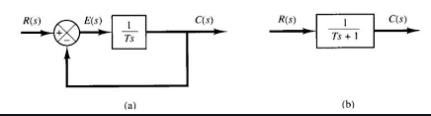

In [330]:
print("A resposta C_total pode ser escrita da seguinte forma")
display(Eq(C, C_transitoria + C_estacionária))
print("O diagrama de blocos de um sistema de primeira ordem pode \nser representado da seguinte forma")
Image.open("SPO.png")

Fisicamente o diagrama de blocos acima pode representar um circuito RC, um sistemas termico, ou algo semelhante.


In [331]:
print("Relação entrada e saida pode ser descrita como:")
eq = [None]*20
eq[0] = C/R
eq[1] = 1/(T*s +1)
Eq(eq[0], eq[1])

Relação entrada e saida pode ser descrita como:


Iremos considerar R(s) sendo um degrau unitário e logo em seguida iremos
 expandir em frações parciais


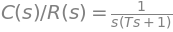

In [332]:
print("Iremos considerar R(s) sendo um degrau unitário e logo em seguida iremos\n expandir em frações parciais")
Eq(eq[0],eq[1] * 1/s)

In [333]:
print("Expandindo em frações parciais temos:")
eq[2]=eq[1]*1/s
eq[2] = eq[2].subs(s, x)
eq[2] = apart(eq[2]).subs(x, s)
Eq(eq[0],eq[2])

Expandindo em frações parciais temos:


In [334]:
print("Podemos perceber que a inversa de laplace de C(s) ficara da seguinte forma")
eq[3] =inverse_laplace_transform(eq[2], s, t)
eq[3]

Podemos perceber que a inversa de laplace de C(s) ficara da seguinte forma


In [335]:
funcao = Function("funcao")(t)
funcao = Lambda(t, 1-(E**(-t)))

In [336]:
vetor= []
t = np.linspace(0, 5, 300)
for i in t:
    vetor.append(funcao(i))


Podemos perceber que todas funçoes de primeira ordem possuiram a seguinte cara


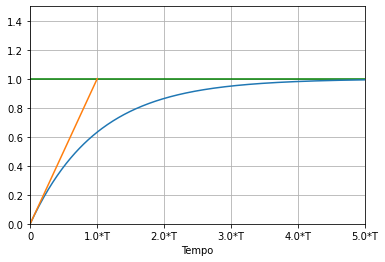

In [350]:
t1 =np.linspace(0,1,300)
print("Podemos perceber que todas funçoes de primeira ordem possuiram a seguinte cara")
fig, ax = plt.subplots()
ax.plot(t, vetor)
ax.hlines(1,0,100, "g")
ax.plot(t1, 1*t1)
ax.set_xlim(0,5)
ax.set_ylim(0,1.5)
ax.grid()
ax.set_xlabel("Tempo")
plt.xticks(np.linspace(0,5,6), np.linspace(0,5,6)*T);


